<a href="https://colab.research.google.com/github/animeshc137/Time-Series/blob/main/Moving_Averages_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install --upgrade pandas-datareader

In [29]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [30]:
df_tesla =pdr.get_data_yahoo('TSLA')

In [31]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000



# Simple moving average (SMA)

formula: (n is the window size)

         (x1+x2+...+xn)/n
         
         (x2+x3+...+xn+1)/n
         .
         .
         .
         .

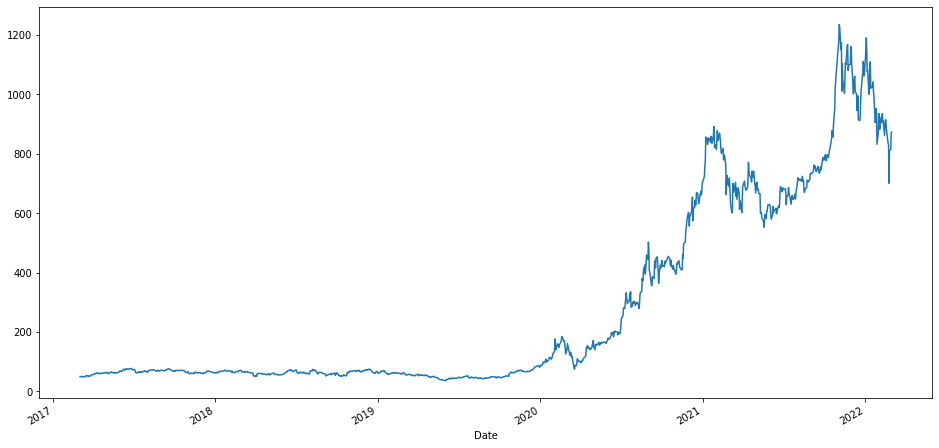

In [42]:
df_tesla['Open'].plot(figsize= (16,8))

In [33]:
df_tesla['Open 10 Days Rollling'] = df_tesla['Open'].rolling(window= 10, min_periods=1).mean()

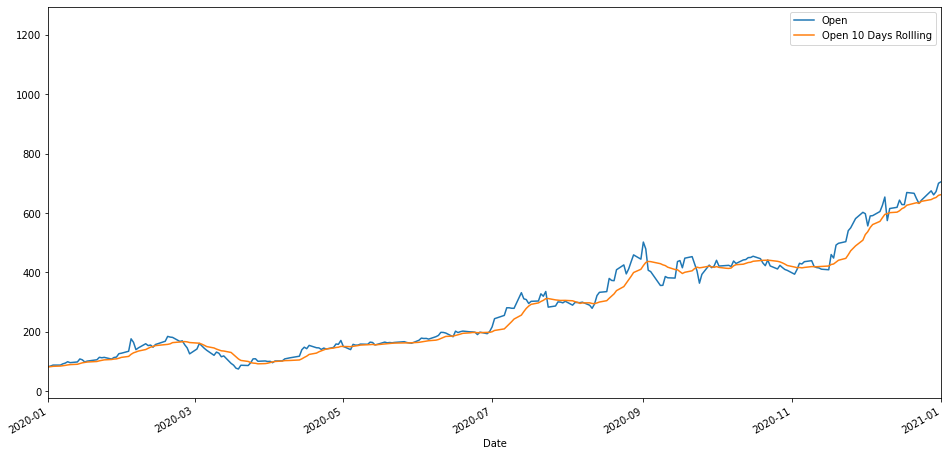

In [34]:
df_tesla[['Open','Open 10 Days Rollling']].plot(figsize= (16,8),xlim=['2020-01-01','2021-01-01'])


In [35]:
df_tesla['Open 20 Days Rollling'] = df_tesla['Open'].rolling(window= 20, min_periods=1).mean()

In [36]:
df_tesla['Open 30 Days Rollling'] = df_tesla['Open'].rolling(window= 30, min_periods=1).mean()

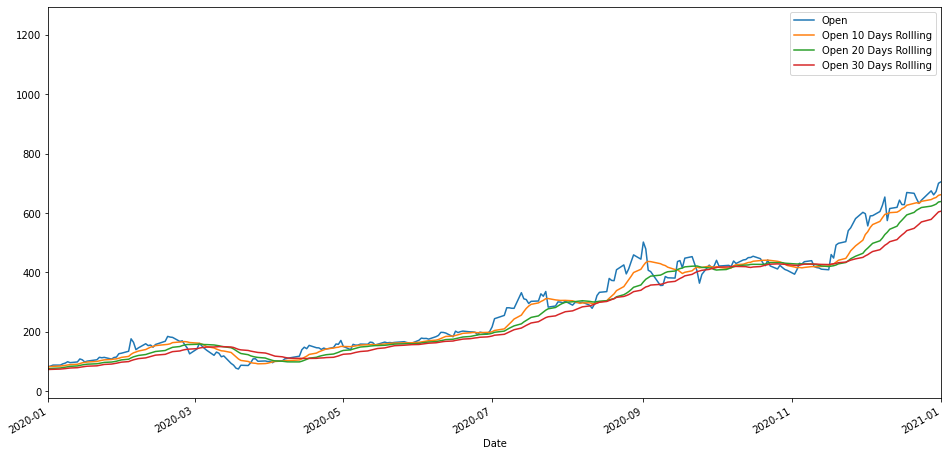

In [37]:
df_tesla[['Open','Open 10 Days Rollling','Open 20 Days Rollling','Open 30 Days Rollling']].plot(figsize= (16,8),xlim=['2020-01-01','2021-01-01'])

# Cummulative Moving Average (CMA)
formula:
             
        (x1+x2+...+xn)/n
        (x1+x2+...+xn+1)/n+1
        (x1+x2+...+xn+2)/n+2
        .
        .
        .


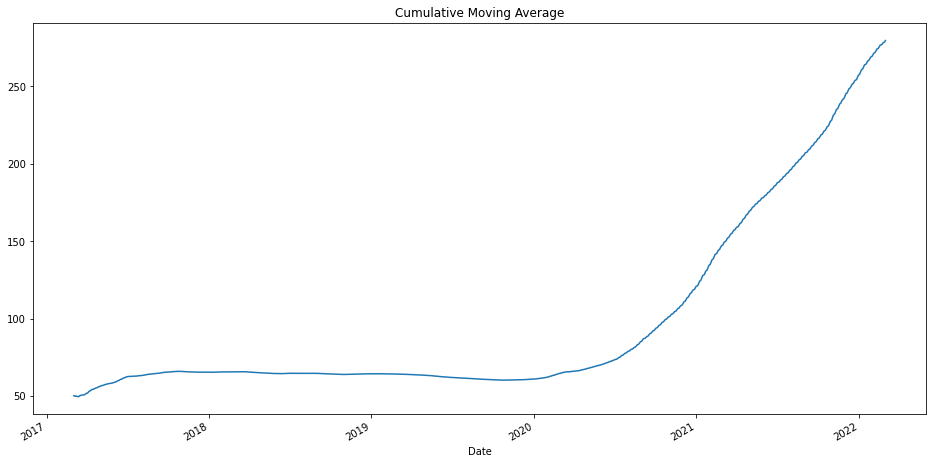

In [41]:
# usinf expanding method
df_tesla['Open'].expanding().mean().plot(figsize=(16,8),title='Cumulative Moving Average')

# Exponential Moving Average (EMA)
Formula: (Value- Prev_EMA)*Multiplier +Prev_EMA

Multiplier = 2/(Window+1)

Value is the column value

In [43]:
df_tesla['Open EMA 0.1'] = df_tesla['Open'].ewm(alpha= 0.1, adjust= False).mean() # alpha is smoothening factor

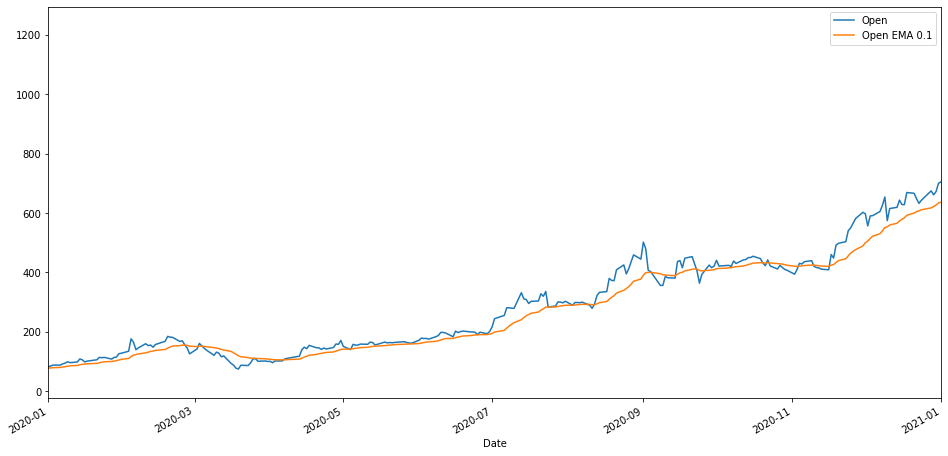

In [44]:
df_tesla[['Open','Open EMA 0.1']].plot(figsize= (16,8),xlim=['2020-01-01','2021-01-01'])

In [45]:
df_tesla['Open EMA 0.3'] = df_tesla['Open'].ewm(alpha= 0.3, adjust= False).mean()

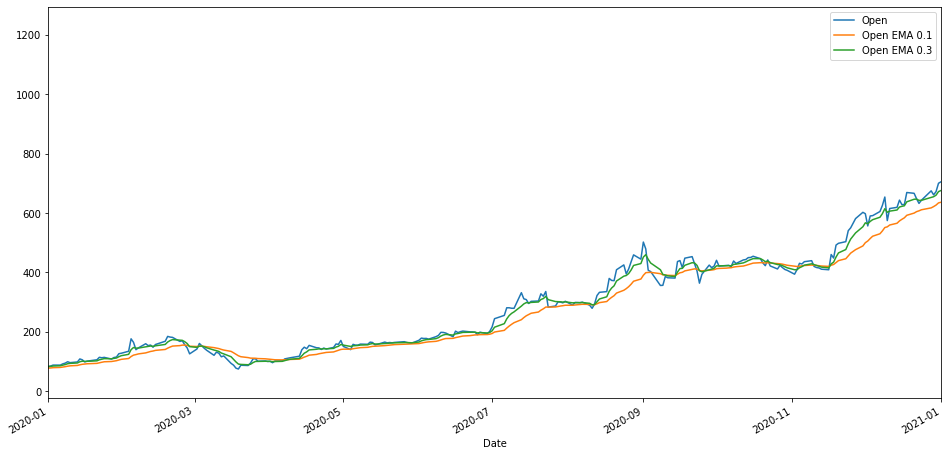

In [46]:
df_tesla[['Open','Open EMA 0.1','Open EMA 0.3']].plot(figsize= (16,8),xlim=['2020-01-01','2021-01-01'])

# EWMA

In [47]:
df_tesla['Open EWMA 5 Days'] = df_tesla['Open'].ewm(span=5).mean()

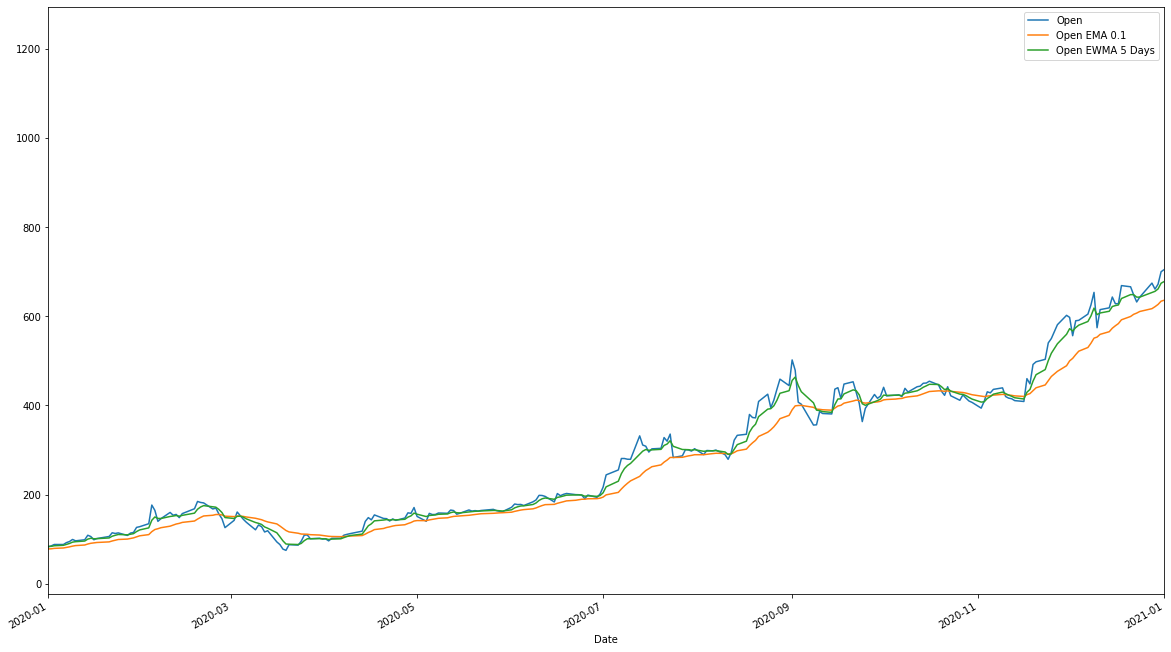

In [49]:
df_tesla[['Open','Open EMA 0.1','Open EWMA 5 Days']].plot(figsize= (20,12),xlim=['2020-01-01','2021-01-01'])